<a href="https://colab.research.google.com/github/skymined/study_data_analytics/blob/main/docs/quests/DDA/SpineSurgeryList_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 폰트 설치 및 시각화

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 코렙의 경우 설치 후 runtime  > restart 해야함

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## Quest3
- 가장 빨리 입원 / 오래 입원한 기간
- 오래 입원한 일자 중 5위를 일자 시각화
- 수술 일자를 (월, 주, 일) 단위로 분해하고 시각화

In [4]:
import pandas as pd

In [27]:
df_surgerylist = pd.read_csv("/content/SpineSurgeryList.csv")
df_surgerylist.describe()

,Unnamed: 0,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추전방위증
count,1894.000000,1894.000000,1894.000000,462.000000,1843.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,...,1894.000000,1894.000000,1890.000000,1890.000000,1893.000000,1894.000000,998.000000,1893.000000,1894.000000,1894.000000
mean,946.500000,39.270750,2.295671,31.142857,0.049919,0.020063,0.130940,0.302534,0.062830,0.004224,...,2096.421600,0.247096,46.593651,16.329841,15.287934,0.056494,-1.507325,1989.788774,4.430834,0.032207
std,546.895023,13.675874,0.996143,10.131304,0.217836,0.140254,0.337424,0.638461,0.242721,0.064871,...,472.834488,0.661506,22.736211,8.421322,10.426397,0.230935,0.495867,314.478436,3.595680,0.176596
min,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1016.800000,0.000000,11.900000,-10.600000,-27.400000,0.000000,-2.840000,1145.800000,1.000000,0.000000
25%,473.250000,30.700000,1.000000,24.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1765.285000,0.000000,38.700000,10.500000,8.800000,0.000000,-1.820000,1777.000000,4.000000,0.000000
50%,946.500000,40.200000,2.000000,31.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2056.500000,0.000000,45.100000,15.700000,14.500000,0.000000,-1.520000,1985.500000,4.000000,0.000000
75%,1419.750000,48.600000,3.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2374.350000,0.000000,52.000000,21.400000,21.100000,0.000000,-1.202500,2178.500000,4.000000,0.000000
max,1893.000000,89.000000,5.000000,68.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,5569.000000,3.000000,559.000000,48.700000,165.000000,1.000000,1.700000,3214.200000,45.000000,1.000000


In [50]:
df_surgerylist[['환자ID','입원기간', '입원일자', '퇴원일자', '수술일자']]

,환자ID,입원기간,입원일자,퇴원일자,수술일자
0,1PT,3,20190713,20190716,20190715
1,2PT,1,20190715,20190716,20190716
2,3PT,72,20190729,20190801,20190731
3,4PT,72,20190731,20190803,20190802
4,5PT,4,20190903,20190907,20190906
...,...,...,...,...,...
1889,1890PT,1,20170407,20170408,20170407
1890,1891PT,3,20170426,20170429,20170427
1891,1892PT,2,20170410,20170412,20170411
1892,1893PT,3,20170408,20170411,20170410


#### 입원 기간 구하기

In [51]:
df_surgerylist['입원일자_datetime'] = pd.to_datetime(df_surgerylist['입원일자'], format = "%Y%m%d")
df_surgerylist['퇴원일자_datetime'] = pd.to_datetime(df_surgerylist['퇴원일자'], format = "%Y%m%d")
df_surgerylist['입원기간_datetime'] = df_surgerylist['퇴원일자_datetime'] - df_surgerylist['입원일자_datetime']
df_surgerylist['입원기간_datetime'] = df_surgerylist['입원기간_datetime'].dt.days
df_day_compose = df_surgerylist[['환자ID','입원일자_datetime', '퇴원일자_datetime', '입원기간_datetime']]
df_day_compose.sort_values(by='입원기간_datetime', ascending=True)

,환자ID,입원일자_datetime,퇴원일자_datetime,입원기간_datetime
1030,1031PT,2018-01-23,2012-02-29,-2155
1026,1027PT,2017-12-15,2012-02-29,-2116
998,999PT,2017-10-19,2012-02-29,-2059
1006,1007PT,2017-07-03,2012-02-29,-1951
1009,1010PT,2017-06-07,2012-02-29,-1925
...,...,...,...,...
1031,1032PT,2011-04-17,2012-02-29,318
1034,1035PT,2011-01-27,2012-02-29,398
1033,1034PT,2010-04-26,2012-02-29,674
1014,1015PT,2010-02-02,2012-02-29,757


In [53]:
# 짧게, 오래 입원한 기간을 확인
# 이상치 무시할 경우 -2155일, 1125일
# 이상치를 무시하지 않을 경우 0일, 1125일
df_day_compose.describe()

,입원기간_datetime
count,1894.000000
mean,-8.881204
std,151.338187
min,-2155.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,1125.000000


In [54]:
df_day_compose_sort = df_day_compose.sort_values(by='입원기간_datetime', ascending=True)[-5:]
df_day_compose_sort

,환자ID,입원일자_datetime,퇴원일자_datetime,입원기간_datetime
1031,1032PT,2011-04-17,2012-02-29,318
1034,1035PT,2011-01-27,2012-02-29,398
1033,1034PT,2010-04-26,2012-02-29,674
1014,1015PT,2010-02-02,2012-02-29,757
1019,1020PT,2009-01-30,2012-02-29,1125


<Axes: xlabel='입원기간_datetime', ylabel='환자ID'>

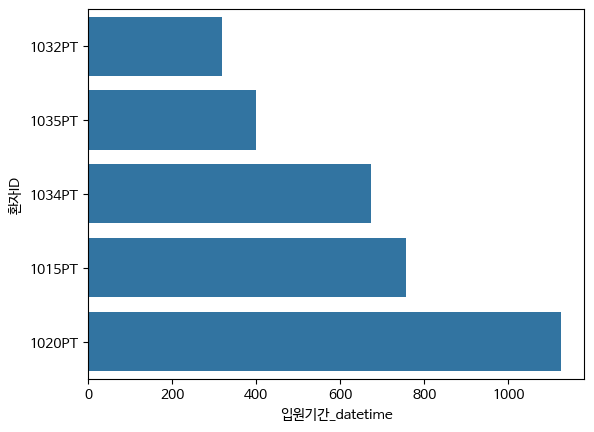

In [55]:
import seaborn as sns
sns.barplot(data=df_day_compose_sort, x='입원기간_datetime', y='환자ID')

#### 수술일자 분해 후 시각화

In [58]:
df_surgerylist['수술일자_datetime'] = pd.to_datetime(df_surgerylist['수술일자'], format = "%Y%m%d")
df_surgerylist['수술일자_datetime']

0      2019-07-15
1      2019-07-16
2      2019-07-31
3      2019-08-02
4      2019-09-06
          ...    
1889   2017-04-07
1890   2017-04-27
1891   2017-04-11
1892   2017-04-10
1893   2017-04-12
Name: 수술일자_datetime, Length: 1894, dtype: datetime64[ns]

In [66]:
df_surgerylist['수술일자_year'] = df_surgerylist['수술일자_datetime'].dt.year
df_surgerylist['수술일자_week'] = df_surgerylist['수술일자_datetime'].dt.isocalendar().week
df_surgerylist['수술일자_day'] = df_surgerylist['수술일자_datetime'].dt.day

<Axes: xlabel='수술일자_year', ylabel='count'>

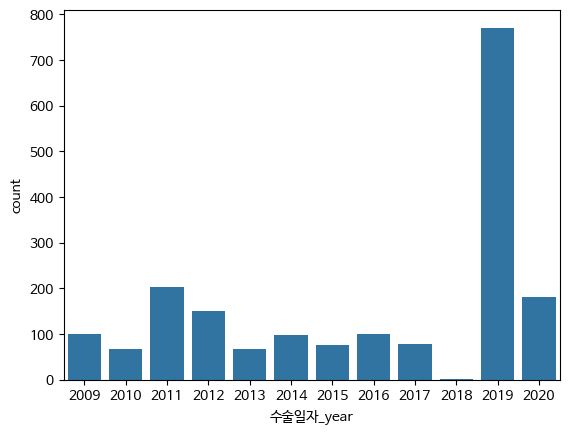

In [62]:
sns.countplot(data=df_surgerylist,x='수술일자_year')

<Axes: xlabel='count', ylabel='수술일자_week'>

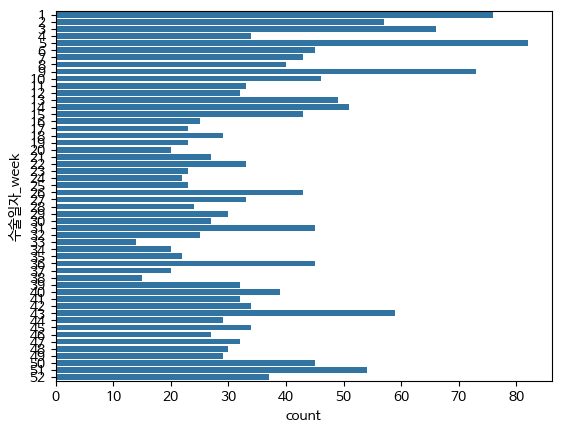

In [64]:
sns.countplot(data=df_surgerylist,y='수술일자_week')

<Axes: xlabel='수술일자_day', ylabel='count'>

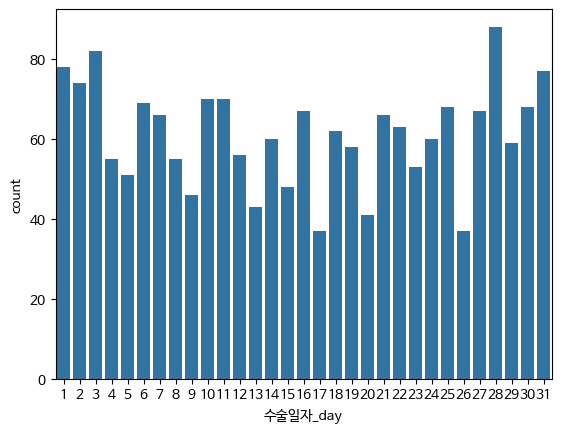

In [67]:
sns.countplot(data=df_surgerylist,x='수술일자_day')